In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [19]:
path = "../data/Test_knight.csv"
data_test = pd.read_csv(path)

columns = data_test.columns
N = len(columns)

In [20]:
path = "../data/Train_knight.csv"
data_train= pd.read_csv(path)

In [21]:
encoder = LabelEncoder()
labels = encoder.fit_transform(data_train['knight'])

data_train['knight'] = labels

In [22]:
train_normalized = preprocessing.normalize(data_train, axis=0)
train_normalized = pd.DataFrame(train_normalized, columns=data_train.columns)

new_knight = train_normalized['knight'].unique()
print(new_knight)

train_normalized.head()

[0.06375767 0.        ]


,Sensitivity,Hability,Strength,Power,Agility,Dexterity,Awareness,Prescience,Reactivity,Midi-chlorien,...,Evade,Stims,Sprint,Combo,Delay,Attunement,Empowered,Burst,Grasping,knight
0,0.040775,0.044231,0.039818,0.029504,0.046780,0.027033,0.011998,0.013290,0.050857,0.047914,...,0.046831,0.038530,0.027469,0.046278,0.028592,0.020718,0.020192,0.047374,0.047340,0.063758
1,0.068453,0.056762,0.068780,0.086073,0.050610,0.044548,0.062197,0.077064,0.043560,0.042947,...,0.059051,0.083691,0.117209,0.056247,0.052181,0.076810,0.090028,0.047187,0.044390,0.000000
2,0.037906,0.044077,0.037951,0.025378,0.045895,0.048279,0.039770,0.029315,0.041000,0.052858,...,0.051383,0.040385,0.023285,0.051746,0.067620,0.068331,0.058624,0.043300,0.055565,0.063758
3,0.040153,0.046588,0.040411,0.027926,0.060490,0.064328,0.042895,0.045145,0.053886,0.057753,...,0.048571,0.039489,0.025812,0.066217,0.047676,0.045554,0.053383,0.045345,0.054038,0.063758
4,0.038909,0.050817,0.037723,0.026512,0.043815,0.019142,0.002131,0.004596,0.045075,0.050493,...,0.050541,0.034220,0.021306,0.041218,0.012794,0.003622,0.010677,0.043590,0.044379,0.063758


In [23]:
test_normalized = preprocessing.normalize(data_test, axis=0)
test_normalized = pd.DataFrame(test_normalized, columns=data_test.columns)

test_normalized.head()

,Sensitivity,Hability,Strength,Power,Agility,Dexterity,Awareness,Prescience,Reactivity,Midi-chlorien,...,Recovery,Evade,Stims,Sprint,Combo,Delay,Attunement,Empowered,Burst,Grasping
0,0.059478,0.077057,0.061803,0.038594,0.111874,0.180851,0.154475,0.125929,0.106811,0.116954,...,0.066471,0.075516,0.066571,0.039480,0.120332,0.228243,0.162075,0.151419,0.167844,0.154602
1,0.095051,0.075544,0.095278,0.103957,0.074292,0.069436,0.072118,0.088581,0.073785,0.068919,...,0.102002,0.078822,0.103153,0.111688,0.082707,0.067870,0.089284,0.113609,0.077449,0.074781
2,0.076457,0.076112,0.075473,0.068422,0.077464,0.045866,0.047322,0.062953,0.065230,0.071080,...,0.085016,0.087998,0.083088,0.079141,0.083969,0.049295,0.068756,0.094615,0.076589,0.073423
3,0.070520,0.054295,0.069674,0.056607,0.076773,0.051784,0.042644,0.057231,0.077527,0.069207,...,0.067362,0.054885,0.067130,0.049460,0.082592,0.046713,0.056392,0.075739,0.075274,0.064870
4,0.079895,0.053917,0.081655,0.070411,0.084239,0.136005,0.132910,0.116784,0.103685,0.084403,...,0.080558,0.054372,0.084232,0.068216,0.079724,0.156869,0.148767,0.140717,0.118006,0.088883


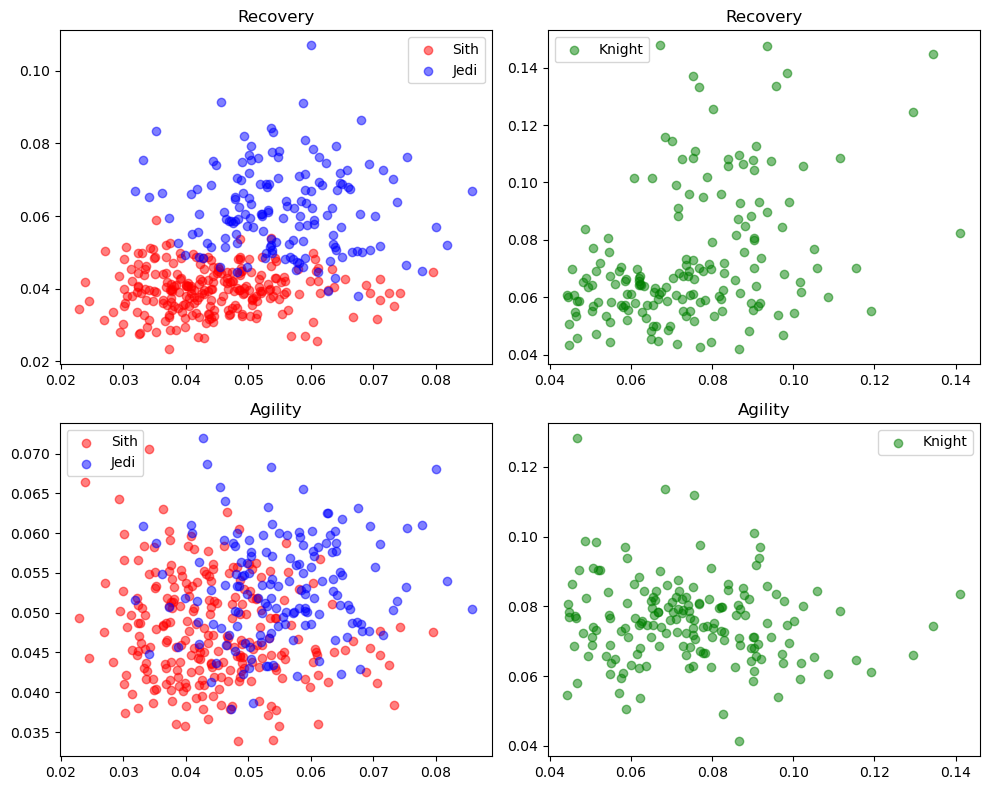

In [25]:
data_sith = train_normalized[train_normalized['knight'] == new_knight[0]]
data_jedi = train_normalized[train_normalized['knight'] == new_knight[1]]

col_test = 'Evade'

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].scatter(data_sith[col_test],data_sith['Recovery'], marker='o', alpha=0.5, c='r')
axs[0, 0].scatter(data_jedi[col_test],data_jedi['Recovery'], marker='o', alpha=0.5, c='b')
axs[0, 0].set_title('Recovery')
axs[0, 0].legend(['Sith', 'Jedi'])

axs[0, 1].scatter(test_normalized[col_test],test_normalized['Recovery'], marker='o', alpha=0.5, c='g')
axs[0, 1].set_title('Recovery')
axs[0, 1].legend(['Knight'])

axs[1, 0].scatter(data_sith[col_test],data_sith['Agility'], marker='o', alpha=0.5, c='r')
axs[1, 0].scatter(data_jedi[col_test],data_jedi['Agility'], marker='o', alpha=0.5, c='b')
axs[1, 0].set_title('Agility')
axs[1, 0].legend(['Sith', 'Jedi'])


axs[1, 1].scatter(test_normalized[col_test],test_normalized['Agility'], marker='o', alpha=0.5, c='g')
axs[1, 1].set_title('Agility')
axs[1, 1].legend(['Knight'])

plt.tight_layout()
plt.show()